In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv.imread("line.jpg")
assert image is not None, "unable to read file"

In [3]:
resized = cv.resize(image, (320,240))
gray = cv.cvtColor(resized, cv.COLOR_BGR2GRAY)

#convert the image into an int32
row = gray[180].astype(np.int32)
#print(row)

In [4]:
#get a list of differences from every pixel of this row
diff = np.diff(row)
#print(diff)

Plotting the diff list

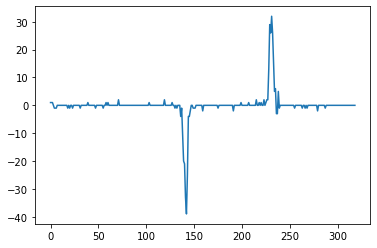

In [5]:
#since we are using the x axis

x = np.arange(len(diff))
plt.plot(x, diff) #this is a none blurred image
plt.savefig('NO BLUR') #the noise is visible


In [6]:
gray = cv.cvtColor(resized, cv.COLOR_BGR2GRAY)
blurred = cv.blur(gray, (1,1))
row = blurred[180].astype(np.int32)
diff = np.diff(row)
x_blurred = np.arange(len(diff))
#plt.plot(x_blurred, diff)


Locating the line from the images....
The peaks from the image represent the edges of our line,
to fint the middle, add the left and right peaks and divide them by two.


In [7]:
diff = np.diff(row)
#print(diff)

max_d = np.amax(diff, 0)
min_d = np.amin(diff, 0)
print(min_d, max_d)

-39 32


These are values and not locations. therefore, we need to find the index of these locations.

In [8]:
highest = np.where(diff == max_d) [0] [0]
# print(highest)
lowest = np.where(diff == min_d)[0][0]
# print(lowest)
middle = (highest + lowest) // 2
# print(middle)


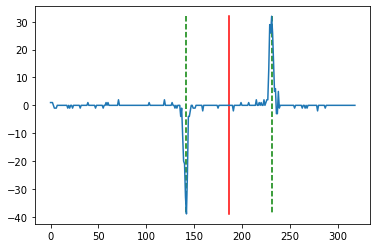

In [9]:
plt.plot([middle, middle], [max_d, min_d], "r-")
plt.plot([lowest, lowest], [max_d, min_d], 'g--')
plt.plot([highest, highest], [max_d, min_d], 'g--')
plt.plot(x, diff)